In [ ]:
import cv2
import os
import numpy as np
from sklearn.decomposition import PCA
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

In [ ]:
"""
Mounting the Google drive
"""
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/Colab Notebooks/COEN240_TA/"
train_path = root_path + "train/"
validate_path = root_path + "validate/"

Mounted at /content/drive


In [ ]:
with open(train_path + 'train_cleaned_final.npy', 'rb') as f:
    trainX = np.load(f)
    trainY = np.load(f)

with open(validate_path + 'validate_cleaned_final.npy', 'rb') as f:
    testX = np.load(f)
    testY = np.load(f)

print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape)

(10289, 40000) (10289,) (1781, 40000) (1781,)
(10289, 40000)


In [ ]:
from sklearn.metrics import classification_report
import argparse
import imutils
import time
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
print("[INFO] creating eigenfaces...")
pca = PCA(
	svd_solver="randomized",
	n_components=100,
	whiten=True)
start = time.time()
trainX = pca.fit_transform(trainX)
end = time.time()
print("[INFO] computing eigenfaces took {:.4f} seconds".format(
	end - start))
# import pickle
# filename = os.path.join(root_path, 'pca_model.sav')
# pickle.dump(pca, open(filename, 'wb'))

[INFO] creating eigenfaces...
[INFO] computing eigenfaces took 102.2973 seconds


In [ ]:
from sklearn.svm import SVC
print("SVM Algorithm with RBF kernel")
svc_model = SVC(kernel="rbf", C=10.0, gamma=0.01)
svc_model.fit(trainX, trainY)
print("Training score=",svc_model.score(trainX,trainY))
svc_predictions = svc_model.predict(pca.transform(testX))
print("Accuracy = ", sum(svc_predictions == testY)/len(svc_predictions))
print("F1-score = ",f1_score(testY, svc_predictions, average="macro"))
print("Precision = ",precision_score(testY, svc_predictions, average="macro"))
print("Recall = ",recall_score(testY, svc_predictions, average="macro"))

SVM Algorithm with RBF kernel
Training score= 1.0
Accuracy =  0.9393599101628298
F1-score =  0.9390368110696238
Precision =  0.9521754618777636
Recall =  0.9369866763392631


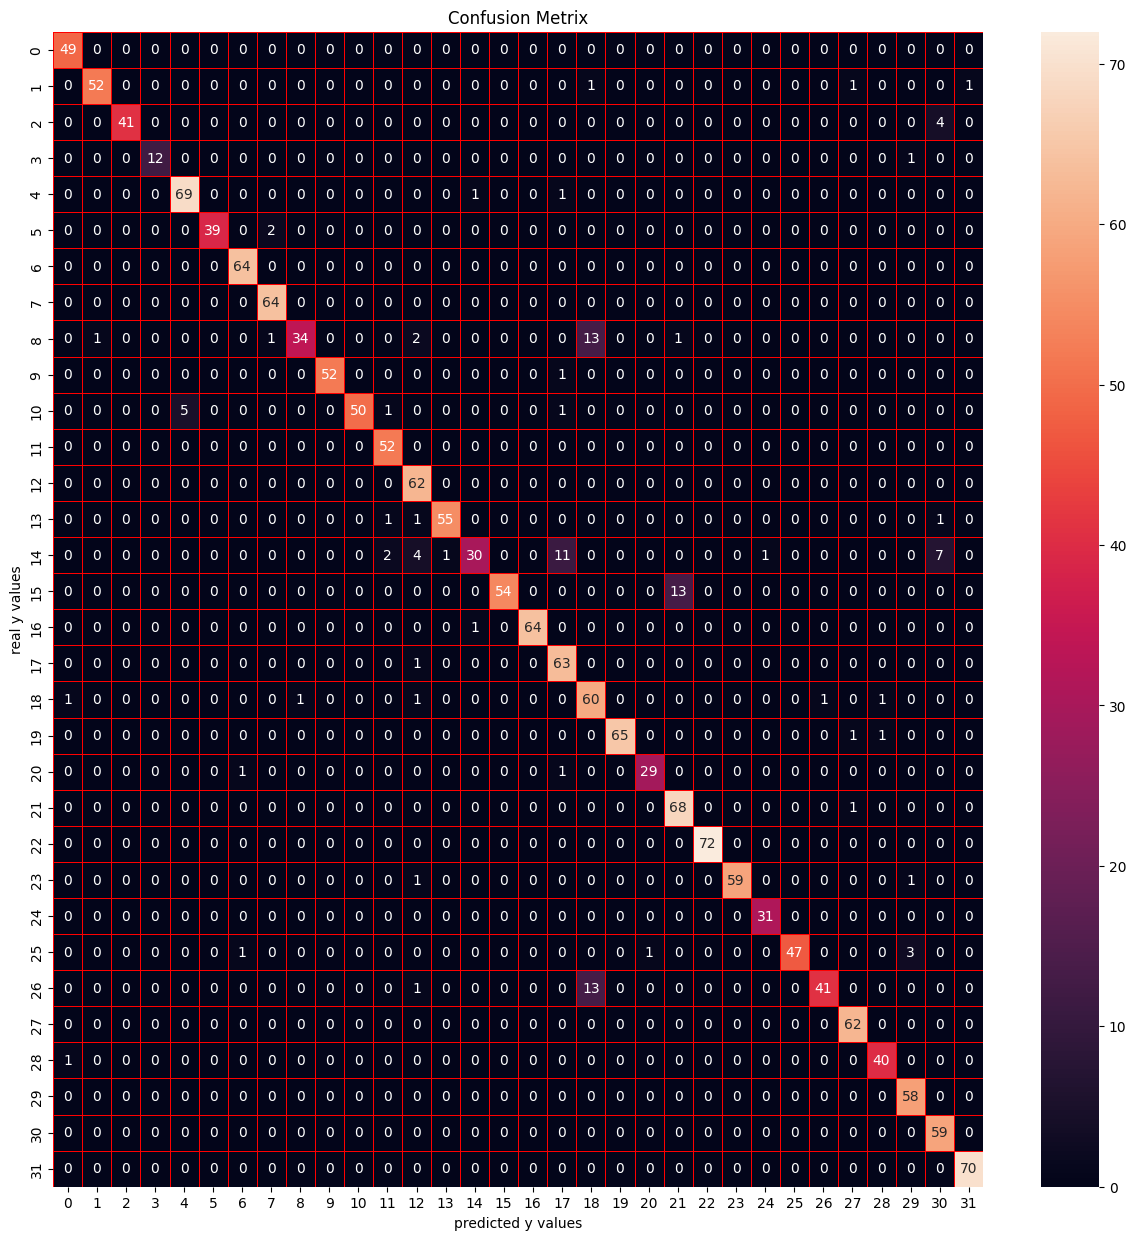

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, svc_predictions)

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(15,15))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion Metrix")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree Algorithm\n")
i = 15
while i<=19:
  dtc = DecisionTreeClassifier(max_depth = i, min_samples_split=51)
  dtc.fit(trainX,trainY)
  print("Training score=",dtc.score(trainX,trainY),"max_depth = ", i)
  dtc_predictions = dtc.predict(pca.transform(testX))
  print("Accuracy = ",sum(dtc_predictions == testY)/len(dtc_predictions), "\n")
  print("F1-score = ",f1_score(testY, dtc_predictions, average="macro"))
  print("Precision = ",precision_score(testY, dtc_predictions, average="macro"))
  print("Recall = ",recall_score(testY, dtc_predictions, average="macro"))
  i+=2

Decision Tree Algorithm

Training score= 0.6807269899893089 max_depth =  15
Accuracy =  0.41549691184727683 

F1-score =  0.40287550071308403
Precision =  0.4136527098434853
Recall =  0.4142868404370241
Training score= 0.6891826222179026 max_depth =  17
Accuracy =  0.4244806288601909 

F1-score =  0.4104425041735682
Precision =  0.42020078914522596
Recall =  0.4213805407158665
Training score= 0.6931674603945962 max_depth =  19
Accuracy =  0.420550252667041 

F1-score =  0.4051687439666978
Precision =  0.41265342329161947
Recall =  0.4180601035188989


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN Algorithm")
i=3
while i<=13:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(trainX,trainY)
  print("Training score=",knn.score(trainX,trainY), "Neighbours = ",i)
  knn_predictions = knn.predict(pca.transform(testX))
  print("Accuracy = ",sum(knn_predictions == testY)/len(knn_predictions))
  i+=2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN Algorithm with neighbour 3")
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX,trainY)
print("Training score=",knn.score(trainX,trainY))
knn_predictions = knn.predict(pca.transform(testX))
print("Accuracy = ",sum(knn_predictions == testY)/len(knn_predictions))
print("F1-score = ",f1_score(testY, knn_predictions, average="macro"))
print("Precision = ",precision_score(testY, knn_predictions, average="macro"))
print("Recall = ",recall_score(testY, knn_predictions, average="macro"))

KNN Algorithm with neighbour 3
Training score= 0.9690932063368646
Accuracy =  0.8102189781021898
F1-score =  0.7956562834006086
Precision =  0.8402912623380285
Recall =  0.802058895763913


In [ ]:
from sklearn.ensemble import RandomForestClassifier
i = 100
print("Random Forest Algorithm")
while i<=500:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(trainX,trainY)
  print("Training score=",rf.score(trainX,trainY), "n-estimators = ", i)
  rf_predictions = rf.predict(pca.transform(testX))
  print("Accuracy = ",sum(rf_predictions == testY)/len(rf_predictions))
  i+=100

Random Forest Algorithm
Training score= 1.0 n-estimators =  100
Accuracy =  0.7995508141493542
Training score= 1.0 n-estimators =  200
Accuracy =  0.8208871420550252
Training score= 1.0 n-estimators =  300
Accuracy =  0.8315553060078608
Training score= 1.0 n-estimators =  400
Accuracy =  0.8338012352610893
Training score= 1.0 n-estimators =  500
Accuracy =  0.8315553060078608


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Algorithm")
rf = RandomForestClassifier(n_estimators=400)
rf.fit(trainX,trainY)
print("Training score=",rf.score(trainX,trainY))
rf_predictions = rf.predict(pca.transform(testX))
print("Accuracy = ",sum(rf_predictions == testY)/len(rf_predictions))
print("F1-score = ",f1_score(testY, rf_predictions, average="macro"))
print("Precision = ",precision_score(testY, rf_predictions, average="macro"))
print("Recall = ",recall_score(testY, rf_predictions, average="macro"))

Random Forest Algorithm
Training score= 1.0
Accuracy =  0.8338012352610893
F1-score =  0.8244071100055291
Precision =  0.8571533520510661
Recall =  0.8318425533534033


In [ ]:
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")
lr=LogisticRegression()
lr.fit(trainX,trainY)
print("Training score=",lr.score(trainX,trainY))
lr_predictions = lr.predict(pca.transform(testX))
print("Accuracy = ", sum(lr_predictions == testY)/len(lr_predictions))
print("F1-score = ",f1_score(testY, lr_predictions, average="macro"))
print("Precision = ",precision_score(testY, lr_predictions, average="macro"))
print("Recall = ",recall_score(testY, lr_predictions, average="macro"))

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score= 0.9964039265234717
Accuracy =  0.8944413250982594
F1-score =  0.8908178962710833
Precision =  0.8997916762165946
Recall =  0.8912580771844589


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(trainX, trainY)
print("Training score=",classifier.score(trainX,trainY))
classifier_predictions = lr.predict(pca.transform(testX))
print("Accuracy = ", sum(classifier_predictions == testY)/len(lr_predictions))
print("F1-score = ",f1_score(testY, classifier_predictions, average="macro"))
print("Precision = ",precision_score(testY, classifier_predictions, average="macro"))
print("Recall = ",recall_score(testY, classifier_predictions, average="macro"))

Training score= 1.0
Accuracy =  0.8944413250982594
F1-score =  0.8908178962710833
Precision =  0.8997916762165946
Recall =  0.8912580771844589


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create KNN model
knn_modell = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')  # You can adjust the parameters accordingly

# Create SVM model
svm_modell = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)  # Use the best hyperparameters or tune them

# Create Logistic Regression model
logreg_modell = LogisticRegression(C=0.1, max_iter=100, penalty='l2')  # Parameters provided

rf_modell = RandomForestClassifier(n_estimators=400)

# Create an ensemble using a soft voting strategy
ensemble_model = VotingClassifier(estimators=[('knn', knn_modell), ('svm', svm_modell), ('logreg', logreg_modell), ('rf', rf_modell)], voting='soft')

# Fit the ensemble model on the training data
ensemble_model.fit(trainX, trainY)
print("Training score=",ensemble_model.score(trainX,trainY))

# Make predictions and calculate accuracy for the ensemble
ensemble_predictions = ensemble_model.predict(pca.transform(testX))
ensemble_accuracy = accuracy_score(testY, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)
print("F1-score = ",f1_score(testY, ensemble_predictions, average="macro"))
print("Precision = ",precision_score(testY, ensemble_predictions, average="macro"))
print("Recall = ",recall_score(testY, ensemble_predictions, average="macro"))

Training score= 1.0
Ensemble Accuracy: 0.9348680516563729
F1-score =  0.9319683414825857
Precision =  0.9425275766321906
Recall =  0.9326590475664949


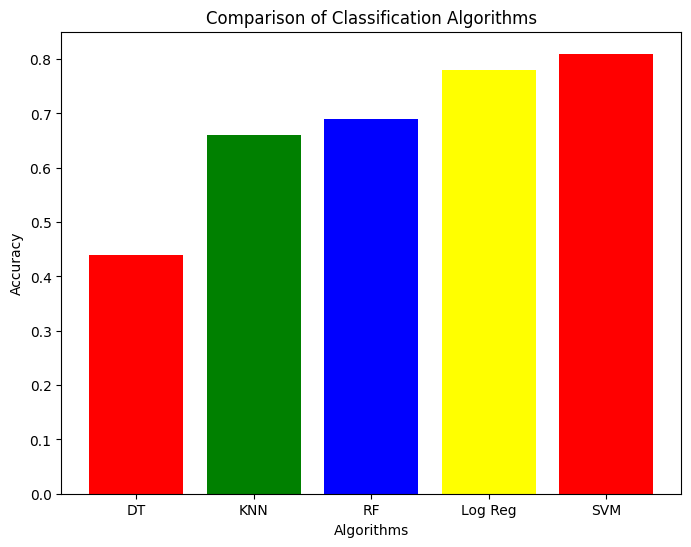

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'DT':0.44, 'KNN':0.66, 'RF':0.69,
		'Log Reg':0.78, 'SVM': 0.81}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 6))

# creating the bar plot
plt.bar(courses, values, color=['red', 'green', 'blue', 'yellow'])

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Algorithms")
plt.show()


In [ ]:
# # generate a sample of testing data
# idxs = np.random.choice(range(0, len(testY)), size=20, replace=False)
# # loop over a sample of the testing data
# for i in idxs:
# 	# grab the predicted name and actual name
# 	predName = label_encoder.inverse_transform([predictions[i]])[0]
# 	actualName = label_encoder.classes_[testY[i]]
# 	# grab the face image and resize it such that we can easily see
# 	# it on our screen
# 	# face = np.dstack([origTest[i]] * 3)
# 	# face = imutils.resize(face, width=250)
# 	# # draw the predicted name and actual name on the image
# 	# cv2.putText(face, "pred: {}".format(predName), (5, 25),
# 	# 	cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# 	# cv2.putText(face, "actual: {}".format(actualName), (5, 60),
# 	# 	cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
# 	# display the predicted name  and actual name
# 	print("[INFO] prediction: {}, actual: {}".format(
# 		predName, actualName))
# 	# display the current face to our screen
# 	# cv2.imshow("Face", face)
# 	# cv2.waitKey(0)

[INFO] prediction: zhangyuanzhen
, actual: zhangyuanzhen

[INFO] prediction: huangjiaoyan
, actual: huangjiaoyan

[INFO] prediction: zotaharsh
, actual: zotaharsh

[INFO] prediction: mendonakshay
, actual: mendonakshay

[INFO] prediction: ravijayanthidhanasekar
, actual: ravijayanthidhanasekar

[INFO] prediction: banmingkai
, actual: banmingkai

[INFO] prediction: somaniachal
, actual: somaniachal

[INFO] prediction: virvadianisargjyotin
, actual: sampagaonrahul

[INFO] prediction: liuhongji
, actual: banmingkai

[INFO] prediction: ravijayanthidhanasekar
, actual: ravijayanthidhanasekar

[INFO] prediction: yashasvi
, actual: sampagaonrahul

[INFO] prediction: somaniachal
, actual: sampagaonrahul

[INFO] prediction: amarisian
, actual: amarisian

[INFO] prediction: manglaniroshanlakhi
, actual: sampagaonrahul

[INFO] prediction: mendonakshay
, actual: mendonakshay

[INFO] prediction: zhangyuanzhen
, actual: zhangyuanzhen

[INFO] prediction: manglaniroshanlakhi
, actual: sampagaonrahul



In [ ]:
# import pickle
# filename = os.path.join(root_path, 'finalized_model.sav')
# pickle.dump(svc_model, open(filename, 'wb'))

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# clf = LinearDiscriminantAnalysis()
# clf.fit(trainX, trainY)
# predictions = clf.predict(pca.transform(testX))
# print("[INFO] evaluating model...")
# print(predictions)
# print(testY)
# print(sum(predictions == testY)/len(predictions))

[INFO] evaluating model...
[31 13 22 ... 28 11 25]
[31 13 22 ... 28 11 25]
0.884764542936288
